### Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:#### 
Room Ty, e
Property T, pe
Number of Bedr, oms
Amen, ties
Number of Raframe.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [24]:
df = pd.read_parquet('cleaned_listings.parquet')


In [25]:
new_df = df[['room_type','property_type','bedrooms','amenities','number_of_reviews', 'price']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          2860 non-null   object 
 1   property_type      2860 non-null   object 
 2   bedrooms           2860 non-null   float64
 3   amenities          2860 non-null   object 
 4   number_of_reviews  2860 non-null   int64  
 5   price              2860 non-null   float32
dtypes: float32(1), float64(1), int64(1), object(3)
memory usage: 123.0+ KB


## Data Preprocessing

### 1. Preparing Amenities

In [26]:
new_df.amenities.value_counts()

amenities
{}                                                                                                                                                                                                                                                                                                                                  22
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                              11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}                                10
{TV,Inter

In [27]:
# Separating the different amenities and creating a dedicated column for each amenity
# Creating a set of all possible amenities
amenities_list = list(new_df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [28]:
# Creating column variables for each of the different amenities and adding them into the original dataframe
new_df.loc[new_df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
new_df.loc[new_df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
new_df.loc[new_df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
new_df.loc[new_df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
new_df.loc[new_df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
new_df.loc[new_df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
new_df.loc[new_df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
new_df.loc[new_df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
new_df.loc[new_df['amenities'].str.contains('TV'), 'tv'] = 1
new_df.loc[new_df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
new_df.loc[new_df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
new_df.loc[new_df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
new_df.loc[new_df['amenities'].str.contains('Elevator'), 'elevator'] = 1
new_df.loc[new_df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
new_df.loc[new_df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
new_df.loc[new_df['amenities'].str.contains('parking'), 'parking'] = 1
new_df.loc[new_df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
new_df.loc[new_df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
new_df.loc[new_df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
new_df.loc[new_df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
new_df.loc[new_df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
new_df.loc[new_df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
new_df.loc[new_df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
new_df.loc[new_df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
new_df.loc[new_df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
new_df.loc[new_df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
new_df.loc[new_df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
new_df.loc[new_df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/tmp/ipykernel_115/2065093736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[new_df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
/tmp/ipykernel_115/2065093736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[new_df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
/tmp/ipykernel_115/2065093736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [29]:
print(new_df.columns)

Index(['room_type', 'property_type', 'bedrooms', 'amenities',
       'number_of_reviews', 'price', 'check_in_24h', 'air_conditioning',
       'high_end_electronics', 'bbq', 'balcony', 'nature_and_views',
       'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics',
       'white_goods', 'elevator', 'gym', 'child_friendly', 'parking',
       'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool', 'internet',
       'long_term_stays', 'pets_allowed', 'private_entrance', 'secure',
       'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable'],
      dtype='object')


In [30]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = new_df.iloc[:,41:].columns
new_df[cols_to_replace_nulls] = new_df[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
new_df.drop('amenities', axis=1, inplace=True)

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              2860 non-null   object 
 1   property_type          2860 non-null   object 
 2   bedrooms               2860 non-null   float64
 3   number_of_reviews      2860 non-null   int64  
 4   price                  2860 non-null   float32
 5   check_in_24h           0 non-null      float64
 6   air_conditioning       0 non-null      float64
 7   high_end_electronics   0 non-null      float64
 8   bbq                    0 non-null      float64
 9   balcony                0 non-null      float64
 10  nature_and_views       0 non-null      float64
 11  bed_linen              0 non-null      float64
 12  breakfast              236 non-null    float64
 13  tv                     2076 non-null   float64
 14  coffee_machine         0 non-null      float64
 15  cook

In [32]:
# Removing the amenities which have all NULL values for all listings
new_df = new_df.dropna(axis=1, how='all')

In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              2860 non-null   object 
 1   property_type          2860 non-null   object 
 2   bedrooms               2860 non-null   float64
 3   number_of_reviews      2860 non-null   int64  
 4   price                  2860 non-null   float32
 5   breakfast              236 non-null    float64
 6   tv                     2076 non-null   float64
 7   white_goods            2377 non-null   float64
 8   elevator               553 non-null    float64
 9   gym                    316 non-null    float64
 10  hot_tub_sauna_or_pool  125 non-null    float64
 11  internet               2795 non-null   float64
 12  pets_allowed           922 non-null    float64
 13  secure                 574 non-null    float64
 14  accessible             226 non-null    float64
dtypes: f

### 2.Preparing Property type

In [34]:
# Checking to see the total number of each type of property 
new_df.property_type.value_counts()

property_type
House              1408
Apartment          1204
Townhouse            80
Condominium          68
Bed & Breakfast      26
Loft                 22
Cabin                17
Other                13
Camper/RV             8
Boat                  5
Tent                  4
Bungalow              2
Dorm                  1
Chalet                1
Treehouse             1
Name: count, dtype: int64

In [35]:
# Grouping property types with less than <30 count into 'Other'
new_df.loc[~new_df.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
new_df.property_type.value_counts()

property_type
House              1408
Apartment          1204
Townhouse            80
Condominium          68
Other                52
Bed & Breakfast      26
Loft                 22
Name: count, dtype: int64

### 3.Preparing Price

In [36]:
new_df.head()

,room_type,property_type,bedrooms,number_of_reviews,price,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,secure,accessible
0,Entire home/apt,Apartment,1.0,207,85.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,Entire home/apt,Apartment,1.0,43,150.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,Entire home/apt,House,5.0,20,975.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,Entire home/apt,House,3.0,38,450.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,Private room,House,1.0,17,120.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [37]:
# # Remove the $ sign and the two zeroes and dot and remove any ","
# new_df.price = new_df.price.str[1:-3]
# new_df.price = new_df.price.str.replace(",", "")
# new_df.price = new_df.price.astype('int64')
# new_df.info()

AttributeError: Can only use .str accessor with string values!

In [38]:
# To convert NaN values to 0 for preparation for Modelling
new_df = new_df.fillna(0)
# Checking to ensure that there are no NULL entries
new_df.isnull().sum()

room_type                0
property_type            0
bedrooms                 0
number_of_reviews        0
price                    0
breakfast                0
tv                       0
white_goods              0
elevator                 0
gym                      0
hot_tub_sauna_or_pool    0
internet                 0
pets_allowed             0
secure                   0
accessible               0
dtype: int64

## 4.Encoding and Preparation

In [39]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(new_df, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         2860 non-null   float64
 1   number_of_reviews                2860 non-null   int64  
 2   price                            2860 non-null   float32
 3   breakfast                        2860 non-null   float64
 4   tv                               2860 non-null   float64
 5   white_goods                      2860 non-null   float64
 6   elevator                         2860 non-null   float64
 7   gym                              2860 non-null   float64
 8   hot_tub_sauna_or_pool            2860 non-null   float64
 9   internet                         2860 non-null   float64
 10  pets_allowed                     2860 non-null   float64
 11  secure                           2860 non-null   float64
 12  accessible          

## 5.Standardization of variables

In [40]:
# Separating X and y for Modelling
#Predictor Variables
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) 
#Response Variables
y = pd.DataFrame(newTransformedDF["price"]) 

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [41]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 6.Linear Regression

In [42]:
# Regression Problem : Price = (Predictor Variables)*a(i) +b where i from 0 to predictors number
# Creating and fitting the model
linreg = LinearRegression()     
linreg.fit(X_train, y_train)


LinearRegression()

In [43]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [130.04918387]

                         Predictors  Coefficients
0                          bedrooms  5.632861e+01
1                         breakfast -1.920567e+00
2                                tv -1.606577e-01
3                       white_goods  1.928985e+00
4                          elevator  1.533298e+01
5                               gym -1.373483e+00
6             hot_tub_sauna_or_pool -1.003241e-01
7                          internet -3.133689e+00
8                      pets_allowed -2.584732e+00
9                            secure  2.386139e+00
10                       accessible -7.060114e-01
11                number_of_reviews -2.618697e+00
12        room_type_Entire_home_apt  4.099023e+15
13           room_type_Private_room  4.011697e+15
14            room_type_Shared_room  1.502888e+15
15          property_type_Apartment -3.908528e+15
16  property_type_Bed_and_Breakfast -7.513744e+14
17        property_type_Condominium -1.206096e+15
18

In [44]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, testPredictionLR)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, testPredictionLR)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 35.4616466043458
Mean Squared Error (MSE): 3838.538371858323
Root Mean Squared Error (RMSE): 61.955938955505495


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

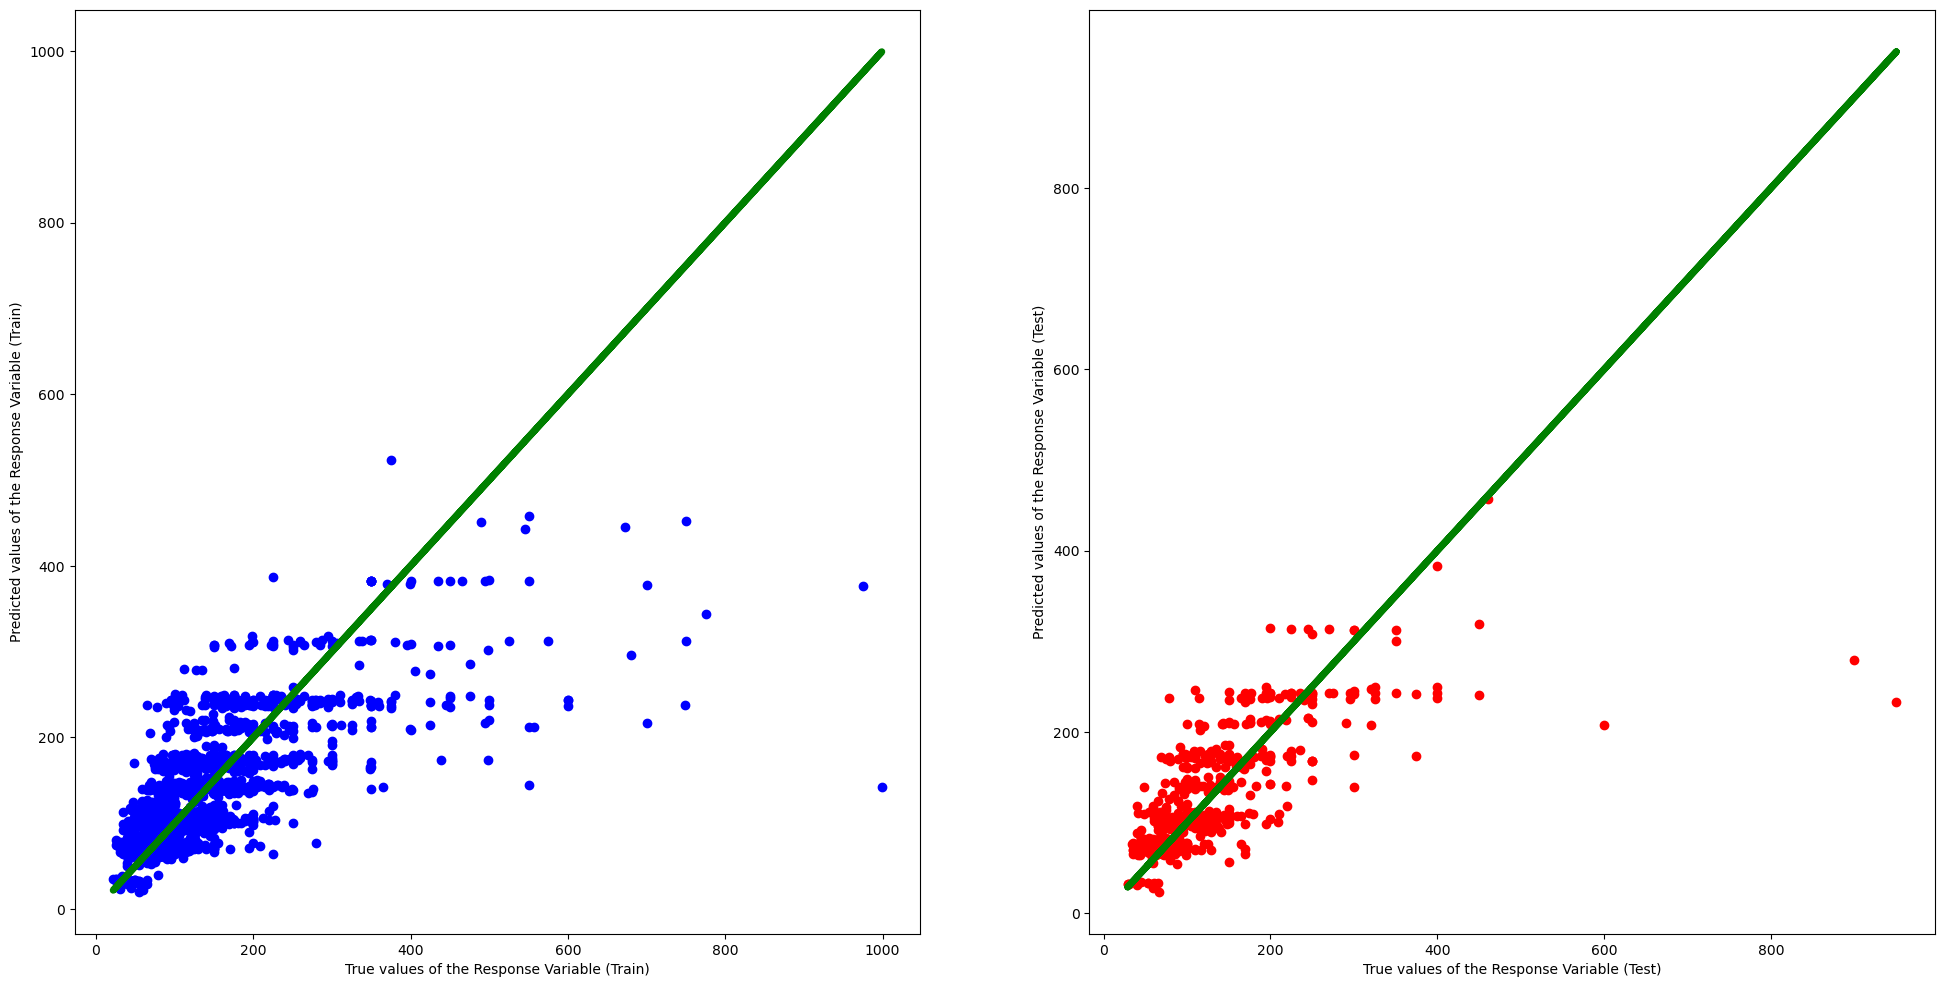

In [46]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

#### Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

## XGBoost

In [52]:
!pip install xgboost
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 763.8 kB/s eta 0:00:000:00:01


In [50]:
import xgboost as xgb
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

# Predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [23:33:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

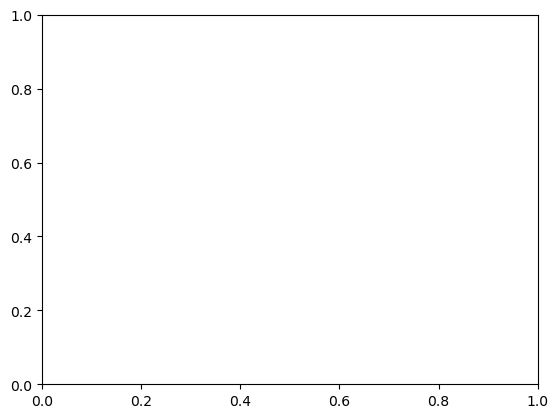

In [53]:
# Ploting decision tree 
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

In [54]:
# Weightage/Importance of each variable 
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg


,weight
property_type_Bed_and_Breakfast,0.004240
internet,0.006326
hot_tub_sauna_or_pool,0.007827
accessible,0.008483
property_type_Townhouse,0.008497
property_type_Condominium,0.011086
property_type_Loft,0.011858
breakfast,0.012215
gym,0.013505
secure,0.014709


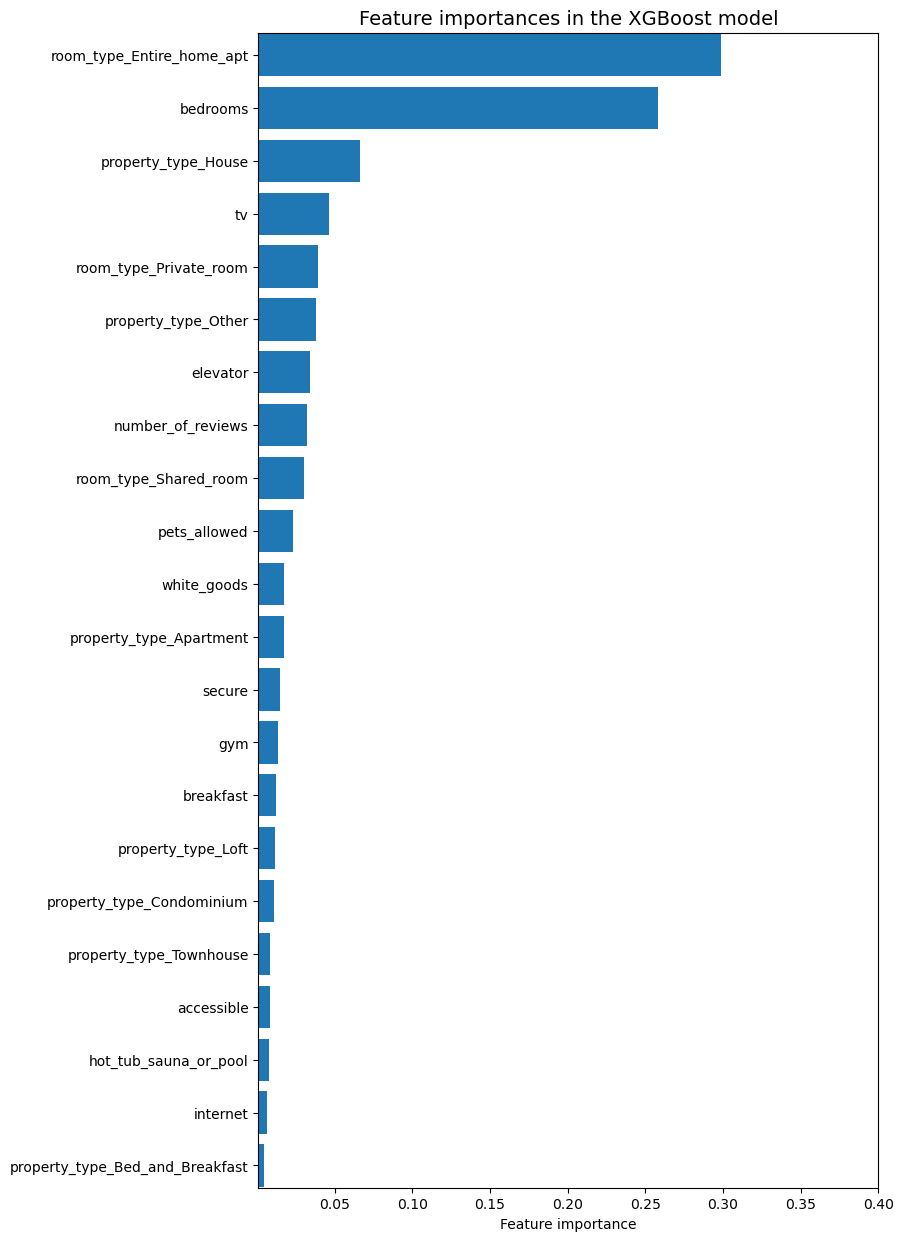

In [55]:
# Plotting feature importances
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

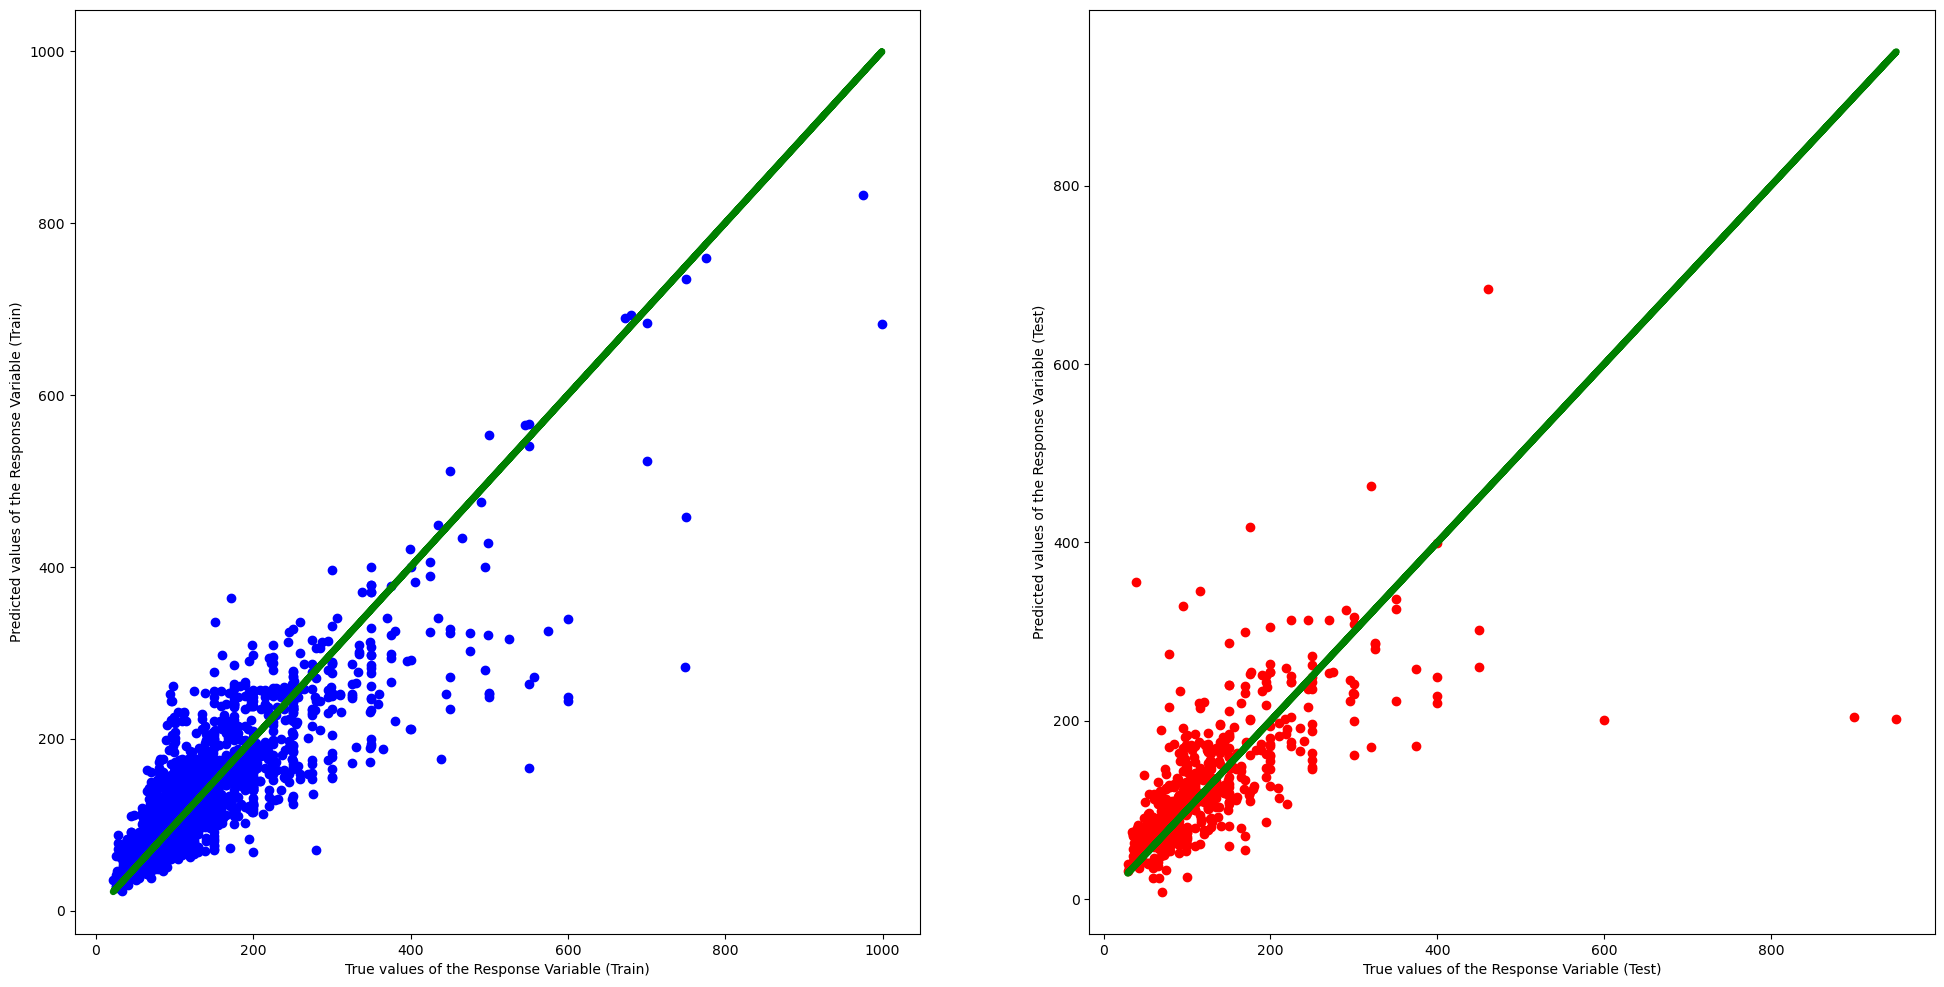

In [56]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

## Points that lie on or near the diagonal line means that the values predicted by the XGBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

## CatBoost

In [59]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 757.1 kB/s eta 0:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 3.2 MB/s eta 0:00:0000:0100:01


In [60]:
from catboost import CatBoostRegressor
# Creating and fitting the model
CatB=CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1,loss_function='RMSE')
CatB.fit(X_train, y_train,plot=True);

# Predicting based on the model
trainPrediction_CatB = CatB.predict(X_train)
testPrediction_CatB = CatB.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 89.3927370	total: 64.3ms	remaining: 2m 8s
1:	learn: 85.6601715	total: 69.8ms	remaining: 1m 9s
2:	learn: 82.8017396	total: 79.4ms	remaining: 52.8s
3:	learn: 80.0791215	total: 88.9ms	remaining: 44.4s
4:	learn: 77.8295490	total: 90.7ms	remaining: 36.2s
5:	learn: 75.8109482	total: 92.2ms	remaining: 30.6s
6:	learn: 73.9408117	total: 93.4ms	remaining: 26.6s
7:	learn: 72.6004052	total: 105ms	remaining: 26.1s
8:	learn: 71.2433113	total: 106ms	remaining: 23.5s
9:	learn: 69.9748761	total: 108ms	remaining: 21.4s
10:	learn: 69.1403147	total: 109ms	remaining: 19.6s
11:	learn: 68.2545452	total: 110ms	remaining: 18.2s
12:	learn: 67.5550139	total: 111ms	remaining: 16.9s
13:	learn: 66.9083946	total: 112ms	remaining: 15.8s
14:	learn: 66.3155250	total: 115ms	remaining: 15.2s
15:	learn: 65.8235101	total: 116ms	remaining: 14.4s
16:	learn: 65.3749671	total: 124ms	remaining: 14.5s
17:	learn: 65.0764149	total: 126ms	remaining: 13.9s
18:	learn: 64.7265149	total: 127ms	remaining: 13.2s
19:	learn: 64.3

In [62]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))
print("\nXGBoost (MSE):", round(mean_squared_error(y_test, testPredictin_xgb_reg),4))
print("XGBoost (R^2):", round(r2_score(y_test, testPredictin_xgb_reg),4))

print("\nCatBoost (MSE):", round(mean_squared_error(y_test, testPrediction_CatB),4))
print("CatBoost (R^2):", round(r2_score(y_test, testPrediction_CatB ),4))



Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 3838.5384
Linear Regression (R^2): 0.5175

XGBoost (MSE): 4706.495
XGBoost (R^2): 0.4084

CatBoost (MSE): 5036.1099
CatBoost (R^2): 0.3669
